In [1]:
import pandas as pd
nutrition = pd.read_csv("../Data Cleaning/Nutrition.csv")
print("letter recognition loaded")
print("Shape of the letter recognition dataset", nutrition.shape)
print("Dataset info", nutrition.info())

letter recognition loaded
Shape of the letter recognition dataset (106260, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   106260 non-null  int64  
 1   YearEnd                     106260 non-null  int64  
 2   LocationAbbr                106260 non-null  object 
 3   LocationDesc                106260 non-null  object 
 4   Datasource                  106260 non-null  object 
 5   Class                       106260 non-null  object 
 6   Topic                       106260 non-null  object 
 7   Question                    106260 non-null  object 
 8   Data_Value_Unit             0 non-null       float64
 9   Data_Value_Type             106260 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float6

In [2]:
nutrition.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


In [3]:
#Remove the hidden spaces or invisible characters from column names.

nutrition.columns = nutrition.columns.str.strip()

# List of unwanted columns
columns_remove= [
    "YearEnd",
     "Datasource",
    "Data_Value_Unit",
    "Data_Value_Alt",
     "Data_Value_Footnote_Symbol",
    "Data_Value_Footnote",
    "Data_Value_Type",
    "Total",
     "ClassID",
    "TopicID",
    "QuestionID",
     "DataValueTypeID",
    "LocationID",
    "StratificationCategoryId1",
    "StratificationID1",
]

# Droping the unwanted columns
nutrition = nutrition.drop(columns = columns_remove, errors = "ignore")
nutrition.head(1)
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                106260 non-null  int64  
 1   LocationAbbr             106260 non-null  object 
 2   LocationDesc             106260 non-null  object 
 3   Class                    106260 non-null  object 
 4   Topic                    106260 non-null  object 
 5   Question                 106260 non-null  object 
 6   Data_Value               93505 non-null   float64
 7   Low_Confidence_Limit     93505 non-null   float64
 8   High_Confidence_Limit    93505 non-null   float64
 9   Sample_Size              93505 non-null   float64
 10  Age(years)               22770 non-null   object 
 11  Education                15180 non-null   object 
 12  Sex                      7590 non-null    object 
 13  Income                   26565 non-null   object 
 14  Race

In [4]:
# Removing the duplicates
duplicate_data = nutrition.duplicated().sum()
nutrition = nutrition.drop_duplicates()
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                 12755
Low_Confidence_Limit       12755
High_Confidence_Limit      12755
Sample_Size                12755
Age(years)                 83490
Education                  91080
Sex                        98670
Income                     79695
Race/Ethnicity             75900
GeoLocation                 1932
StratificationCategory1        0
Stratification1                0
dtype: int64

In [5]:
# Dropping null datavalue
nutrition = nutrition.dropna(subset=["Data_Value"])
nutrition.shape

(93505, 18)

In [6]:
# checking remaining null values. Socio-demographic fields are missing. but it is not error. It only exist for that stratification
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                     0
Low_Confidence_Limit           0
High_Confidence_Limit          0
Sample_Size                    0
Age(years)                 71401
Education                  78769
Sex                        86137
Income                     67722
Race/Ethnicity             73675
GeoLocation                 1929
StratificationCategory1        0
Stratification1                0
dtype: int64

In [7]:
# Standardizing missing entries
nutrition = nutrition.replace(r'^\s*$',pd.NA,regex=True)
nutrition.head(1)

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.8,31.3,38.5,1367.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999"


In [8]:
nutrition.isna().sum()
#checking the data types
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93505 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                93505 non-null  int64  
 1   LocationAbbr             93505 non-null  object 
 2   LocationDesc             93505 non-null  object 
 3   Class                    93505 non-null  object 
 4   Topic                    93505 non-null  object 
 5   Question                 93505 non-null  object 
 6   Data_Value               93505 non-null  float64
 7   Low_Confidence_Limit     93505 non-null  float64
 8   High_Confidence_Limit    93505 non-null  float64
 9   Sample_Size              93505 non-null  float64
 10  Age(years)               22104 non-null  object 
 11  Education                14736 non-null  object 
 12  Sex                      7368 non-null   object 
 13  Income                   25783 non-null  object 
 14  Race/Ethnicity           1

In [9]:
# Handling the categorical columns consistency
for column in ["Class","Topic","StratificationCategory1","Stratification1","LocationDesc",]:
    print(f"\nTotal unique values count in '{column}':{nutrition[column].nunique()}")
    print(f"\n Unique values in  {column}:{nutrition[column].unique()}")


Total unique values count in 'Class':3

 Unique values in  Class:['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']

Total unique values count in 'Topic':3

 Unique values in  Topic:['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']

Total unique values count in 'StratificationCategory1':6

 Unique values in  StratificationCategory1:['Income' 'Age (years)' 'Race/Ethnicity' 'Education' 'Sex' 'Total']

Total unique values count in 'Stratification1':28

 Unique values in  Stratification1:['$15,000 - $24,999' '$25,000 - $34,999' '$35,000 - $49,999'
 '$50,000 - $74,999' '$75,000 or greater' '18 - 24' '2 or more races'
 '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65 or older'
 'American Indian/Alaska Native' 'College graduate' 'Data not reported'
 'Female' 'High school graduate' 'Hispanic' 'Less than $15,000'
 'Less than high school' 'Male' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Some college or technical school' 'Total' 'Oth

In [10]:
# Unique values in  Stratification1 contain "Data not reported"
#Count of data  not reported
import numpy as np 
count_data_not_reported = (nutrition["Stratification1"] == "Data not reported").sum()
nutrition["Stratification1"].value_counts()
nutrition["Stratification1"] = nutrition["Stratification1"].replace("Data not reported",np.nan)

In [11]:
#cleaned data 
cleaned_data= nutrition
cleaned_data

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.8,31.3,38.5,1367.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999"
1,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.8,31.1,40.8,757.0,NaN,NaN,NaN,"$25,000 - $34,999",NaN,"(32.840571122, -86.631860762)",Income,"$25,000 - $34,999"
2,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,28.0,36.8,861.0,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(32.840571122, -86.631860762)",Income,"$35,000 - $49,999"
3,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.1,29.7,38.8,785.0,NaN,NaN,NaN,"$50,000 - $74,999",NaN,"(32.840571122, -86.631860762)",Income,"$50,000 - $74,999"
4,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,25.4,32.5,1125.0,NaN,NaN,NaN,"$75,000 or greater",NaN,"(32.840571122, -86.631860762)",Income,"$75,000 or greater"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106255,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,33.2,28.9,37.8,1347.0,NaN,NaN,NaN,NaN,Non-Hispanic Black,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic Black
106256,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,20.5,14.0,29.1,237.0,NaN,NaN,NaN,NaN,Non-Hispanic White,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic White
106257,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,23.7,10.6,44.7,68.0,NaN,NaN,NaN,NaN,Other,"(18.335765, -64.896335)",Race/Ethnicity,Other
106258,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,28.1,20.5,37.2,397.0,NaN,Some college or technical sch,NaN,NaN,NaN,"(18.335765, -64.896335)",Education,Some college or technical school


In [12]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93505 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                93505 non-null  int64  
 1   LocationAbbr             93505 non-null  object 
 2   LocationDesc             93505 non-null  object 
 3   Class                    93505 non-null  object 
 4   Topic                    93505 non-null  object 
 5   Question                 93505 non-null  object 
 6   Data_Value               93505 non-null  float64
 7   Low_Confidence_Limit     93505 non-null  float64
 8   High_Confidence_Limit    93505 non-null  float64
 9   Sample_Size              93505 non-null  float64
 10  Age(years)               22104 non-null  object 
 11  Education                14736 non-null  object 
 12  Sex                      7368 non-null   object 
 13  Income                   25783 non-null  object 
 14  Race/Ethnicity           1

In [13]:
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                     0
Low_Confidence_Limit           0
High_Confidence_Limit          0
Sample_Size                    0
Age(years)                 71401
Education                  78769
Sex                        86137
Income                     67722
Race/Ethnicity             73675
GeoLocation                 1929
StratificationCategory1        0
Stratification1             3684
dtype: int64

In [14]:
# Research Question 4
# Do states with higher physical activity participation have lower obesity rates?
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset

In [15]:
df = cleaned_data.copy()

# Step 2: Filter Obesity & Physical Activity

In [16]:
obesity_df = df[df['Topic'].str.contains("Obesity", na=False)]
pa_df = df[df['Topic'].str.contains("Physical Activity", na=False)]

# Step 3: Need the columns which keep only for that question

In [17]:
cols = ['YearStart', 'LocationAbbr', 'Data_Value']
obesity_df = obesity_df[cols].rename(columns={'Data_Value': 'Obesity_Rate'})
pa_df = pa_df[cols].rename(columns={'Data_Value': 'Physical_Activity'})

# Step 4: Merge the columns to put in one table

In [18]:
merged = pd.merge(obesity_df, pa_df, on=['YearStart', 'LocationAbbr'], how='inner')

# Step 5: Drop if there missing values 

In [19]:
merged = merged.dropna()

# Step 6: Creating new column for seperating states into high and low obesity groups

In [20]:
merged['Obesity_Class'] = merged['Obesity_Rate'].apply(lambda x: 1 if x > 30 else 0)

# Step 7: Assign X and y values & Model 

In [21]:
X = merged[['Physical_Activity']]
y = merged['Obesity_Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Step 8: Accuracy of Model 

In [23]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

# Step 9: Export the decision tree and print the accuracy

In [24]:
print("Decision Tree Accuracy:", round(acc*100, 2), "%")

print(export_text(clf, feature_names=list(X.columns)))

Decision Tree Accuracy: 70.38 %
|--- Physical_Activity <= 51.25
|   |--- Physical_Activity <= 38.95
|   |   |--- Physical_Activity <= 23.15
|   |   |   |--- class: 1
|   |   |--- Physical_Activity >  23.15
|   |   |   |--- class: 1
|   |--- Physical_Activity >  38.95
|   |   |--- Physical_Activity <= 47.65
|   |   |   |--- class: 1
|   |   |--- Physical_Activity >  47.65
|   |   |   |--- class: 1
|--- Physical_Activity >  51.25
|   |--- Physical_Activity <= 59.75
|   |   |--- Physical_Activity <= 53.95
|   |   |   |--- class: 1
|   |   |--- Physical_Activity >  53.95
|   |   |   |--- class: 1
|   |--- Physical_Activity >  59.75
|   |   |--- Physical_Activity <= 72.70
|   |   |   |--- class: 1
|   |   |--- Physical_Activity >  72.70
|   |   |   |--- class: 1



# Step 10: check the correlation to measure the relationship between physical activity and obesity

In [25]:
correlation = merged['Physical_Activity'].corr(merged['Obesity_Rate'])
print("\nCorrelation between Physical Activity and Obesity:", round(correlation, 3))



Correlation between Physical Activity and Obesity: 0.001


# Based on dataset, higher physical activity in a state does not necessarily mean lower obesity rates.

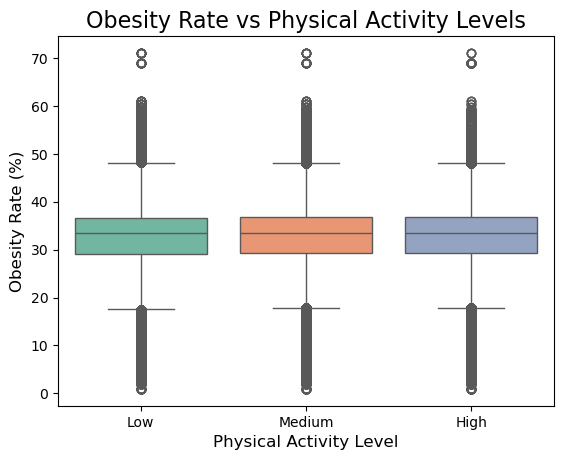

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Boxplot of Obesity Rate by Physical Activity levels (low/medium/high)
(
    merged
    .assign(PA_Level=lambda df: pd.qcut(df['Physical_Activity'], q=3, labels=['Low', 'Medium', 'High']))
    .pipe(lambda df: sns.boxplot(
        x='PA_Level',
        y='Obesity_Rate',
        hue='PA_Level',        
        data=df,
        palette='Set2',
        dodge=False,           
        legend=False       
    ))
)

plt.title('Obesity Rate vs Physical Activity Levels', fontsize=16)
plt.xlabel('Physical Activity Level', fontsize=12)
plt.ylabel('Obesity Rate (%)', fontsize=12)
plt.show()

# The box plot shows that higher physical activity does not clearly mean lower obesity.

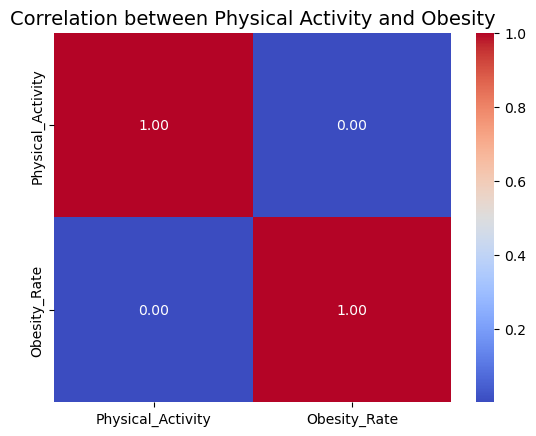

In [31]:
# Correlation heatmap
(
    merged[['Physical_Activity', 'Obesity_Rate']]
    .pipe(lambda df: sns.heatmap(
        df.corr(), 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f"
    ))
)
plt.title('Correlation between Physical Activity and Obesity', fontsize=14)
plt.show()

# Based on the correlation analysis, there is almost no relationship between physical activity levels and obesity rates across U.S. states, indicating that higher physical activity participation does not reliably predict lower obesity rates.